## [실습1] Multinomial Classification 문제를 해결하기 위해 적절한  Learning Rate 를 찾아봅시다.
### 목표 
*  Learning Rate 설정하기
* 데이터 정규화유무에 따른 학습 경향성 파악


<br>
<br>

### 1) 직접 코드를 이해하여 주석을 달아 제출
- 주석을 달면서 이해가 안가는 부분 조교에게 질문

### 2) Learning rate 를 찾아보세요
-  1.5 => 1e-10 => 0.1 순으로 변경해보자. 
- 아래의 ?? 부분에 learning rate 값을 넣으면 된다.
  - optimizer = tf.train.GradientDescentOptimizer(learning_rate=???).minimize(cost)



In [5]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

# 학습용 데이터 셋
x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]

y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]


# 평가용 데이터 셋
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]

y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]




# XW+b 설정
X = tf.placeholder("float", [None, 3]) # 행은 얼마나 들어올지 모르지만, 열은 3개로 고정
Y = tf.placeholder("float", [None, 3]) # 행은 얼마나 들어올지 모르지만, 열은 3개로 고정

W = tf.Variable(tf.random_normal([3, 3])) # XW를 하기 위해서는 X의 열 = W의 행 / 열은 3개로 고정
b = tf.Variable(tf.random_normal([3]))


hypothesis = tf.nn.softmax(tf.matmul(X, W) + b) # 선형 분류. softmax를 사용하여 정규화
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1)) # 선형 분류 cost 계산 방법을 이용하여 cost 추출
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost) # GradientDescent를 이용하여 최소cost구하기


# a = tf.constant([[3, 10, 1],[4, 5, 6],[0, 8, 7]])
# session.run(tf.argmax(a, 0)) -> 인덱스  [1 0 2] 가 가장 크다
# session.run(tf.argmax(a, 1)) -> 인덱스  [1 2 1] 가 가장 크다
prediction = tf.argmax(hypothesis, 1) # hypothesis에서 가장 큰 값 반환
is_correct = tf.equal(prediction, tf.argmax(Y, 1)) # if(prediction == Y에서 가장 큰 값 반환값) return 1, else return 0
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) # 열 단위로 평균 추출(is_correct를 float32값으로 변환)

with tf.Session() as sess: # sess = tf.Session()의 또 다른 표현

    sess.run(tf.global_variables_initializer()) # global_variables_initalizer()를 이용해 변수들을 초기화한 후, 결과를 세션에 전달
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


# 결과
# learning rate = 1.5, nan 발생
# learning rate = 1e-10, nan은 발생하지 않았지만 예측도가 떨어짐(0.0)
# learning rate = 0.1, nan값이 발생하지 않고 예측도가 완벽함(1.0)

0 2.595216 [[ 0.14828414 -1.1842268  -0.4407778 ]
 [ 0.5941795   1.340392   -0.6584907 ]
 [-0.0230028   0.05129077  0.4284553 ]]
1 1.8875829 [[ 0.15476401 -1.2257323  -0.40575206]
 [ 0.70692635  1.1329627  -0.5638082 ]
 [ 0.08325816 -0.13217048  0.5056556 ]]
2 1.6825478 [[ 0.11875311 -1.2228323  -0.37264112]
 [ 0.6187256   1.1311053  -0.47375003]
 [-0.01137124 -0.10657807  0.5746926 ]]
3 1.5328807 [[ 0.10664171 -1.2387744  -0.34458765]
 [ 0.6451185   1.0269926  -0.3960301 ]
 [ 0.01275274 -0.17755057  0.62154114]]
4 1.4523041 [[ 0.07697174 -1.2333007  -0.32039142]
 [ 0.5705146   1.036115   -0.33054876]
 [-0.05493739 -0.13998643  0.6516671 ]]
5 1.403357 [[ 0.06867255 -1.2431663  -0.30222663]
 [ 0.6023443   0.95863396 -0.2848973 ]
 [-0.01664836 -0.18224914  0.65564084]]
6 1.3746909 [[ 0.0461992  -1.2359465  -0.28697312]
 [ 0.5541285   0.97510624 -0.25315383]
 [-0.05231801 -0.13657404  0.64563537]]
7 1.3477013 [[ 0.03815019 -1.2404933  -0.27437732]
 [ 0.5817772   0.92528677 -0.23098302]
 [

## [실습2] 입력 데이터의 정규화의 유무에 따른 모델 학습 성공 유무 확인하기

### 1) 코드에 주석을 달아 제출하세요

### 2) 데이터 정규화 유무에 따른 모델 학습의 결과를 서술하여 제출하세요.

- 입력데이터의 feature 별 값의 스케일 차가 크면, 학습이 이루어지지 않고 발산하기 쉽다. <br> [??] 부분에 xy = min_max_scaler(xy)  코드 넣어, 안정적으로 모델이 학습되는 것을 확인한다.

In [10]:
import tensorflow as tf
import numpy as np




tf.set_random_seed(777)  # 랜덤 시드설정

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])


# very important. It does not work without it.
# 이 코드를 그대로 돌리면 발산하여 nan값이 나온다.
# 따라서 우리는 데이터를 정규화할 필요가 있다.(모든 특성들이 0 과 1 사이에 위치하도록 데이터를 비례적으로 조정)
def min_max_scaler(data):
    numerator = data - np.min(data, 0) # 분자
    denominator = np.max(data, 0) - np.min(data, 0) # 분모
    return numerator / (denominator + 1e-7)
  
xy = min_max_scaler(xy) # xy값을 정규화

x_data = xy[:, 0:-1] # 모든 행, 열 중 맨 앞의 열과 마지막 한열을 제외
y_data = xy[:, [-1]] # 모든 행, 열 중 마지막 한열만을 가지고 배열 만들기

X = tf.placeholder(tf.float32, shape=[None, 4]) # 열이 4인 placeholder 생성
Y = tf.placeholder(tf.float32, shape=[None, 1]) # 열이 1인 placeholder 생성

W = tf.Variable(tf.random_normal([4, 1]), name='weight') # XW + b이므로 행은 무조건 4
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b # 행렬의 곱셈
cost = tf.reduce_mean(tf.square(hypothesis - Y)) # 열 단위로 평균 추출
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost) # cost 최소값 구함

sess = tf.Session() # 세션 설정
sess.run(tf.global_variables_initializer())

for step in range(101): # 100까지 step 돌리기
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    # if step % 10 == 0:    #101개 출력하면 길어져서 10개만 대표확인
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)




[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]
!
[[1.        ]
 [0.83755791]
 [0.6606331 ]
 [0.43800918]
 [0.42624401]
 [0.49276137]
 [0.18597238]
 [0.        ]]
!
0 Cost:  3.9463515 
Prediction:
 [[-2.1793876 ]
 [-1.7115263 ]
 [-1.4586613 ]
 [-1.1753334 ]
 [-1.3885761 ]
 [-1.3231955 ]
 [-0.75447935]
 [-0.62807035]]
1 Cost:  3.9460573 
Prediction:
 [[-2.1792862 ]
 [-1.7114296 ]
 [-1.4585807 ]
 [-1.175271  ]
 [-1.3885021 ]
 [-1.3231239 ]
 [-0.75443226]
 [-0.6280247 ]]
2 Cost:  3.9457626 
Prediction:
 [[-2.1791847 ]
 [-1.7113329 ]
 [-1.4585001 ]
 [-1.1752086 ]
 [-1.388428  ]
 [

## [실습3] mnist 데이터 셋으로 손글씨 데이터 분류하기


- 입력데이터는 28x28 영상 데이터를 784차원의 1차원 백터로 사용
- 출력데이터는 숫자 정답

### 1) 손글씨 데이터 정확도 올리기? 어떻게?
- parameters인 num_epochs와 batch_size를 변경해보자!!
  - num_epochs = 50, batch_size = 100

### 2) 손글씨 데이터 정확도 올리기? 아이디어 있으면 고고!




Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 2.927468839
Epoch: 0002, Cost: 1.122083631
Epoch: 0003, Cost: 0.893103996
Epoch: 0004, Cost: 0.780897876
Epoch: 0005, Cost: 0.711102810
Epoch: 0006, Cost: 0.660522637
Epoch: 0007, Cost: 0.622352033
Epoch: 0008, Cost: 0.591736882
Epoch: 0009, Cost: 0.566317065
Epoch: 0010, Cost: 0.545093061
Epoch: 0011, Cost: 0.526647926
Epoch: 0012, Cost: 0.510631604
Epoch: 0013, Cost: 0.496749826
Epoch: 0014, Cost: 0.484006910
Epoch: 0015, Cost: 0.472562138
Epoch: 0016, Cost: 0.462391974
Epoch: 0017, Cost: 0.453646580
Epoch: 0018, Cost: 0.444665392
Epoch: 0019, Cost: 0.437160311
Epoch: 0020, Cost: 0.429748484
Epoch: 0021, Cost: 0.423083899
Epoch: 0022, Cost: 0.417294601
Epoch: 0023, Cost: 0.411390953
Epoch: 0024, Cost: 0.405904846
Epoch: 0025, Cost: 0.400774483
Epoch: 0026, Cost: 0.396120978


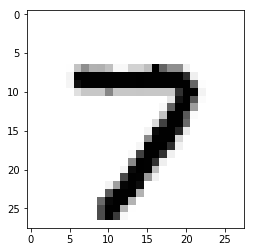

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data # tensorflow에 있는 예제문제

tf.set_random_seed(777)  # 랜덤 시드 설정

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # 데이터 가져오기

nb_classes = 10 # 10개의 숫자. 0~9


# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])

# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

# Wx+b 설정
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
num_epochs = 80 # epoch: 학습용 사진 전체를 딱 한번 사용했을 때 한 세대(이폭, epoch)이 지나갔다고 한다
batch_size = 100 # batch: 한 번에 처리하는 사진의 장수
num_iterations = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()

# num_epochs = 15, batch_size = 100
# num_epochs = 50, batch_size = 100
# >>실험결과: num_epochs가 높을 수록 정확도는 올라간다